<a href="https://colab.research.google.com/github/massirism/PDI-UNS/blob/main/TP4_Massiris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctico 4 - Procesamiento Digital de Imágenes

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

#Error medio cuadrático
def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

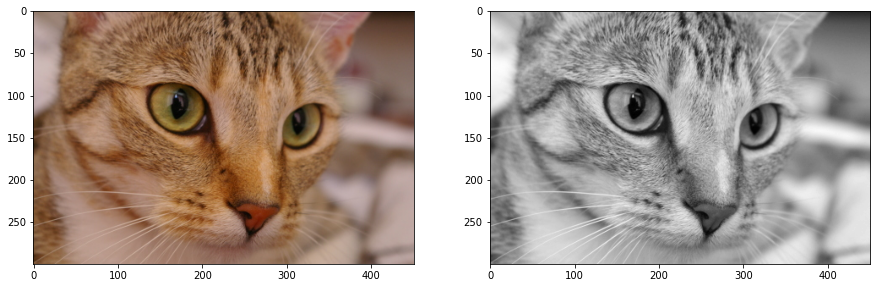

In [ ]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img = rgb2yiq(img_rgb)[:,:,0]

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img, 'gray')

#1. Transformada Discreta de Fourier

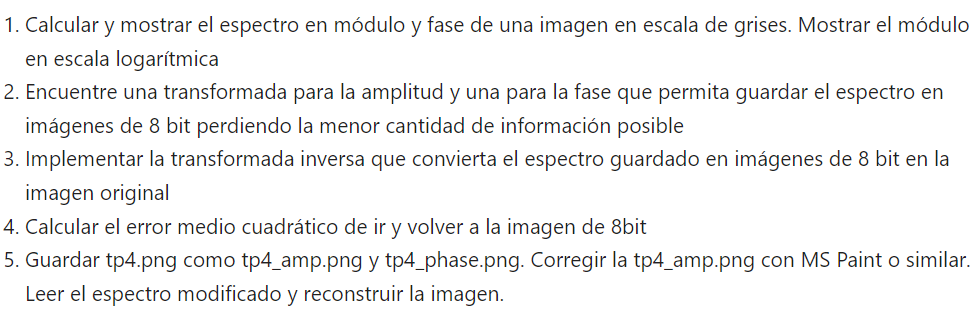

#1.

Text(0.5, 1.0, 'Fase de la imagen transformada')

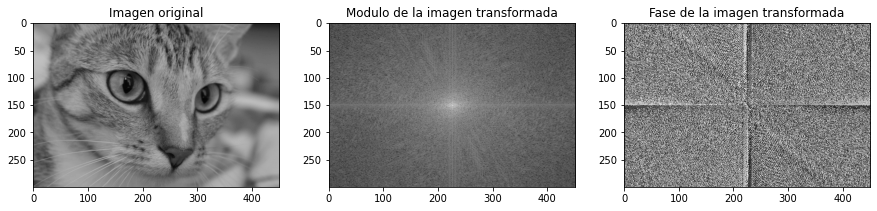

In [ ]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

img_transf=np.fft.fft2(img_gray)
#print(img_transf.shape)
#print(img_transf[0,0])

fshift=np.fft.fftshift(img_transf)

"""
Hicimos ffshift() porque queremos colocar el componente de frecuencia cero al centro del espectro. En otras palabras, una vez que tenemos el resultado, 
el componente de frecuencia cero (componente DC) estará en la esquina superior izquierda. 
Como queremos llevarlo al centro, necesitamos desplazar el resultado por n/2 en ambas direcciones usando np.fft.fftshift().
"""

phase_spectrum=np.angle(fshift)               #Matriz de phase de la imagen
magnitude_spectrum=20*np.log(np.abs(fshift))  #Matriz de modulo (escala logaritmica) de la imagen

#print(phase_spectrum.shape)
#print(magnitude_spectrum.shape)

#print(phase_spectrum)
#print(magnitude_spectrum)

#Muestreo
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_gray,"gray", vmin=0, vmax=1)
axes[0].set_title("Imagen original")
axes[1].imshow(magnitude_spectrum,"gray")
axes[1].set_title("Modulo de la imagen transformada")
axes[2].imshow(phase_spectrum,"gray")
axes[2].set_title("Fase de la imagen transformada")

# 2. Encuentre una transformada para la amplitud y una para la fase que permita guardar el espectro en imágenes de 8 bit perdiendo la menor cantidad de información posible

GRAY


Text(0.5, 1.0, 'Fase de la imagen transformada')

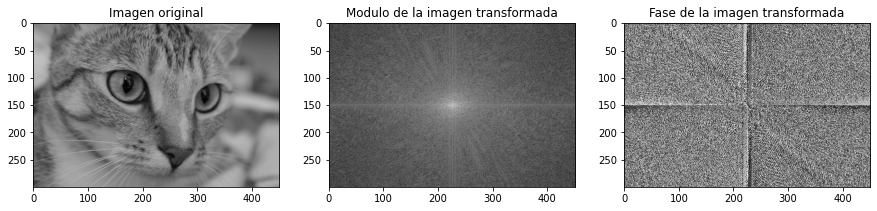

In [ ]:
pot=2 #Realza la luminancia de los pixeles oscuros

def Transformada(img):
  if(len(img.shape)>3):
    print('RGB')
    return "ERROR"
  else:
    print("GRAY")
    cant_pix=np.prod(img.shape[0:2])

    #Transformada rápida de Fourier
    X=np.fft.fftshift(np.fft.fft2(img))/cant_pix   

    #Modulo
    Xm=np.abs(X)
    Xm=np.log(1+5000*Xm**(1/pot))/np.log(5001)
    Xm=Xm/Xm.max()

    #Fase
    Xp=np.angle(X)
    Xp=(1/(2*np.pi))*(Xp + np.pi)

    return Xm,Xp

Modulo_img,Phase_img=Transformada(img_gray)

#Muestreo
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_gray,"gray", vmin=0, vmax=1)
axes[0].set_title("Imagen original")
axes[1].imshow(Modulo_img,"gray")
axes[1].set_title("Modulo de la imagen transformada")
axes[2].imshow(Phase_img,"gray")
axes[2].set_title("Fase de la imagen transformada")

#3. Implementar la transformada inversa que convierta el espectro guardado en imágenes de 8 bit en la imagen original

Text(0.5, 1.0, 'Imagen recuperada')

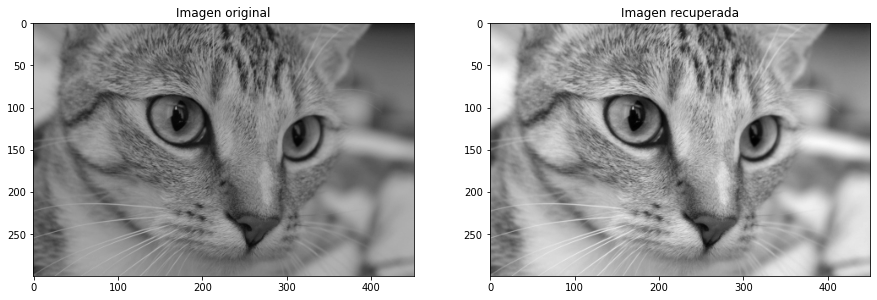

In [ ]:
def Transformada_inv(Xm,Xp):
    #Inversa del modulo
    #Xm=((5000*(np.exp(Xm))-1)/5001)**2
    Xm=((np.exp(Xm*np.log(5000))-1)/5001)**pot
    #Inversa de la fase
    Xp=2*np.pi*Xp-np.pi
  
    #Paso todos a números complejos
    X = Xm * np.cos(Xp) + (Xm * np.sin(Xp))*1j

    #Aplico la TF inversa
    n_pix=np.prod(Xm.shape[0:2])
    img=np.fft.ifft2(np.fft.ifftshift(X*n_pix))

    #Paso la imagen a real
    res=np.real(img)
    return np.real(img)

img_res=Transformada_inv(Modulo_img,Phase_img)

#Muestreo
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_gray,"gray", vmin=0, vmax=1)
axes[0].set_title("Imagen original")
axes[1].imshow(img_res,"gray")
axes[1].set_title("Imagen recuperada")


#4. Calcular el error medio cuadrático de ir y volver a la imagen de 8bit

In [ ]:
print("El error medio cuadrático es: "+str(rmse(img_gray,img_res)))

El error medio cuadrático es: 0.5385862301576931


#5. Guardar tp4.png como tp4_amp.png y tp4_phase.png. Corregir la tp4_amp.png con MS Paint o similar. Leer el espectro modificado y reconstruir la imagen.

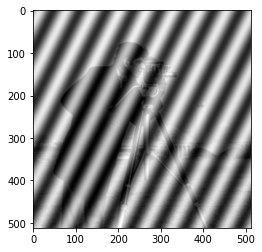

In [ ]:
#Guardo la imagen
bins=255
new_img = imageio.imread('tp4.png')/bins

plt.imshow(new_img,"gray")

GRAY


Text(0.5, 1.0, 'Fase de la imagen transformada')

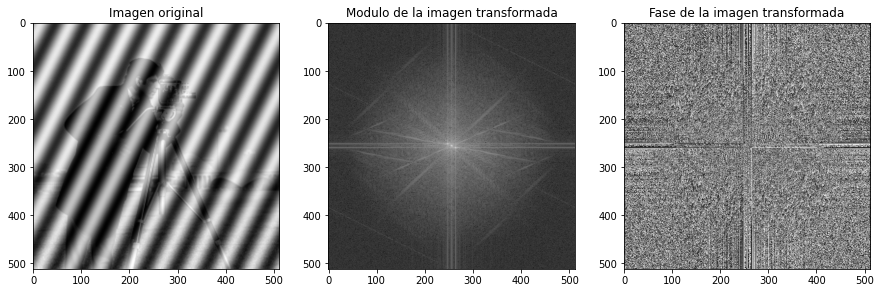

In [ ]:
#Le aplico mi transformada a la imagen
Modulo_img,Phase_img=Transformada(new_img)

#Muestreo
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(new_img,"gray", vmin=0, vmax=1)
axes[0].set_title("Imagen original")
axes[1].imshow(Modulo_img,"gray")
axes[1].set_title("Modulo de la imagen transformada")
axes[2].imshow(Phase_img,"gray")
axes[2].set_title("Fase de la imagen transformada")


In [ ]:
#Librería para descargar los espectros como imágenes
import cv2
#Guardo
cv2.imwrite('tp4_amp.png', Modulo_img*bins)
cv2.imwrite('tp4_phase.png', Phase_img*bins)

True

Text(0.5, 1.0, 'Fase de la imagen')

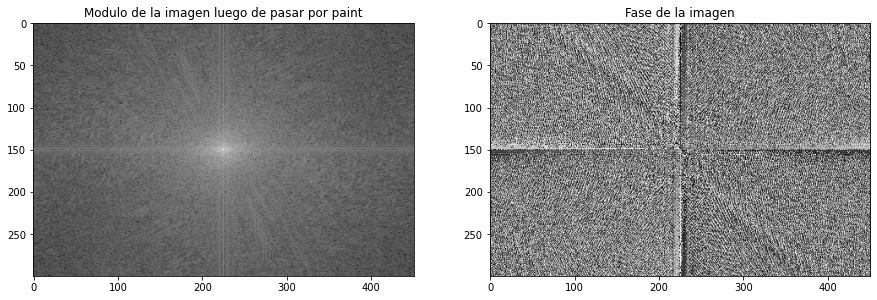

In [ ]:
#Espectros luego de modificarlos en paint
tp4_amp_2=imageio.imread('tp4_new_amp.png')[:,:,0]/bins
tp4_phase=imageio.imread('tp4_phase.png')/bins

#Muestreo
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(magnitude_spectrum,"gray")
axes[0].set_title("Modulo de la imagen luego de pasar por paint")
axes[1].imshow(phase_spectrum,"gray")
axes[1].set_title("Fase de la imagen")

Text(0.5, 1.0, 'Imagen recuperada')

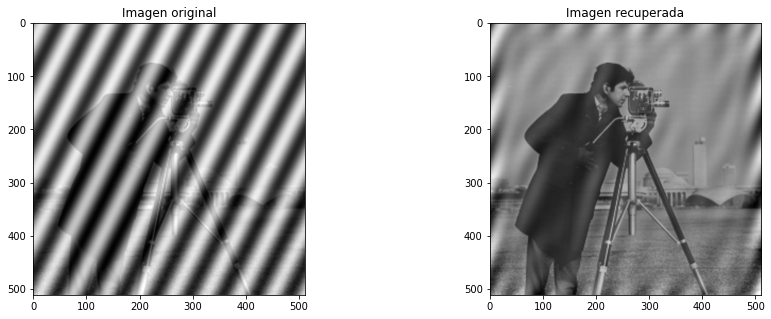

In [ ]:
#Hago la reconstrucción de la imagen

new_img_recontruida=Transformada_inv(tp4_amp_2,tp4_phase)

#Muestreo
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(new_img,"gray")
axes[0].set_title("Imagen original")
axes[1].imshow(new_img_recontruida,"gray")
axes[1].set_title("Imagen recuperada")